# Titanic Data 분석

In [1]:
# 세팅
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

## 1. 데이터 가져오기

In [2]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\캐글 타이타닉\train.csv'
train_df = pd.read_csv(path)

path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\캐글 타이타닉\test.csv'
test_df = pd.read_csv(path)

In [3]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
# 데이터를 한번에 가공하기 위해서 붙이기

titanic_total = pd.concat([train_df, test_df], ignore_index=True)

## 2. 결측 데이터 처리

In [10]:
titanic_total.isna().sum() / len(titanic_total)  *100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

### 2.1 Embarked 결측값 처리

In [13]:
titanic_total['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
# 필터링을 이용해서 빠진 데이터 가져오기

titanic_total[titanic_total['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Embarked', ylabel='count'>

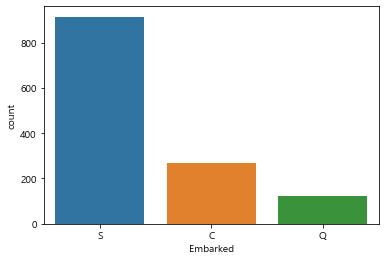

In [15]:
sns.countplot( data=titanic_total, x='Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

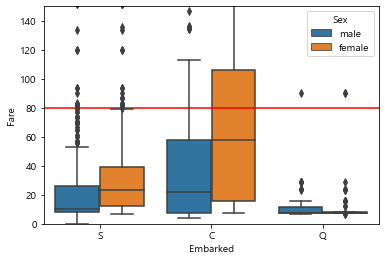

In [19]:
plt.ylim([0, 150])
plt.axhline(80, color='red')
sns.boxplot( data=titanic_total, x='Embarked', y='Fare', hue='Sex')

In [21]:
# 데이터를 바꿀 때 => .loc

titanic_total.loc[ titanic_total['Embarked'].isna() , 'Embarked'] = 'C'

In [22]:
# 확인

titanic_total.loc[ [61, 829] ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C


### 2.2 Fare 결측값 처리

In [24]:
titanic_total[titanic_total['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

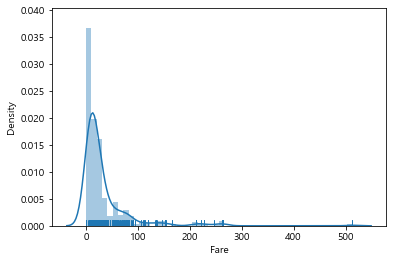

In [27]:
# Fare 값 관찰

sns.distplot( titanic_total['Fare'], rug=True )

In [28]:
fare = titanic_total['Fare']

In [29]:
fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

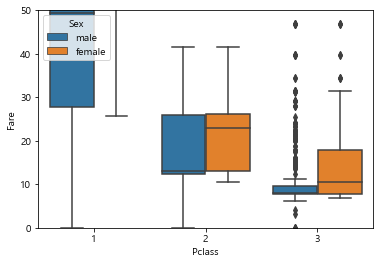

In [46]:
plt.ylim([0, 50])
sns.boxplot(data=titanic_total, y=fare, x=titanic_total['Pclass'], hue='Sex')

In [54]:
# 3등급 남자일 때 중앙값(평균)?

titanic_total.groupby(['Pclass', 'Sex']).median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass Sex                                                        
1      female        710.0       1.0  36.0    0.0    0.0  80.92915
       male          648.0       0.0  42.0    0.0    0.0  49.50420
2      female        589.0       1.0  28.0    0.0    0.0  23.00000
       male          715.0       0.0  29.5    0.0    0.0  13.00000
3      female        637.0       0.5  22.0    0.0    0.0  10.48960
       male          649.0       0.0  25.0    0.0    0.0   7.89580

In [55]:
# 데이터 채우기

titanic_total.loc[ titanic_total['Fare'].isna(), 'Fare'] = 7.89580

In [58]:
titanic_total.loc[1043]

PassengerId                  1044
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.8958
Cabin                         NaN
Embarked                        S
Name: 1043, dtype: object

### 2.3 Age 결측값 처리

In [59]:
# 필터링을 이용해서 빠진 데이터 가져오기

titanic_total[titanic_total['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

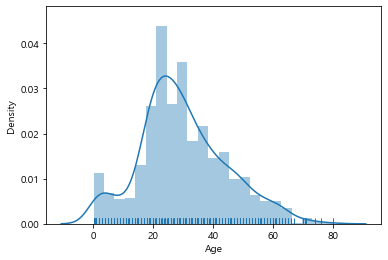

In [61]:
# Age 살펴보기

sns.distplot(titanic_total['Age'], rug=True)

In [62]:
titanic_total['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

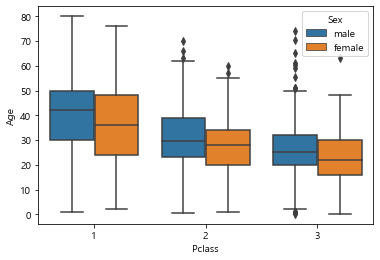

In [71]:
sns.boxplot(data=titanic_total, x='Pclass', y='Age', hue='Sex')

In [76]:
temp = titanic_total.groupby(['Pclass', 'Sex']).mean()

In [81]:
for ix in temp.index:
    cond1 = titanic_total['Pclass'] == ix[0]
    cond2 = titanic_total['Sex'] == ix[1]
    cond3 = titanic_total['Age'].isna()
    
    titanic_total.loc[ cond1 & cond2 & cond3, 'Age' ] = temp.loc[ix, 'Age']
    

In [82]:
titanic_total.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

## 3. Feature Engineering

In [84]:
# Pclass, Sex, Embarked
# Name => 가공해서 카테고리로 만들기
# SipSp, Parch => 가공해서 카테고리로 만들기
# => 마지막에 한번에 One-hot encoding

# Fare, Age => 연속된 숫자
# 표준화, 정규화

titanic_total[['Pclass', 'Sex', 'Embarked']]

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S
...,...,...,...
1304,3,male,S
1305,1,female,C
1306,3,male,S
1307,3,male,S


### 3.1 Name 가공

In [85]:
titanic_total['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [94]:
titanic_total['Name_2'] = titanic_total['Name'].apply( lambda x: x.split(', ')[1].split('.')[0] )

In [96]:
titanic_total['Name_2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

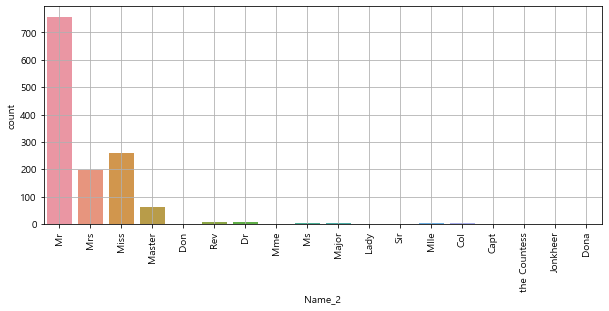

In [98]:
plt.figure(figsize=(10, 4))

sns.countplot(data=titanic_total, x='Name_2')
plt.xticks(rotation=90)
plt.grid()

plt.show()

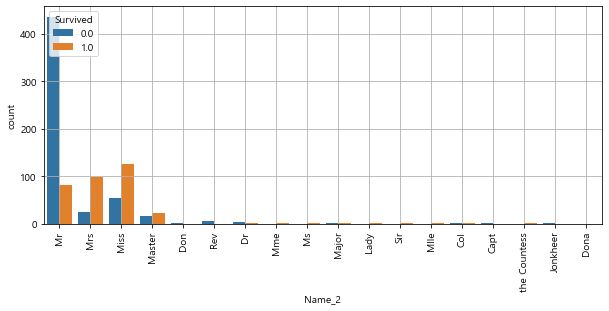

In [99]:
plt.figure(figsize=(10, 4))

sns.countplot(data=titanic_total, x='Name_2', hue='Survived')
plt.xticks(rotation=90)
plt.grid()

plt.show()

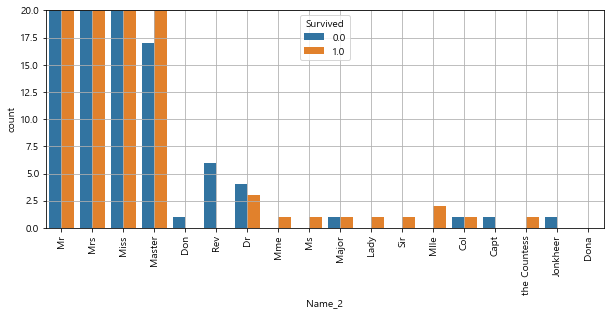

In [103]:
plt.figure(figsize=(10, 4))

plt.ylim([0,20])
sns.countplot(data=titanic_total, x='Name_2', hue='Survived')
plt.xticks(rotation=90)
plt.grid()

plt.show()

In [106]:
# 기존 카테고리를 새로운 카테고리로 mapping 하기

# 'Mr' => 'Mr'
# 'Mrs', 'Miss', 'Mme', 'Ms','Lady','Mlle','Dona' => Woman
# 'Master' =>  'Master'
# 나머지는 => 'etc'

name_map = {
                'Mr':'Mr',
                'Mrs':'Woman', 'Miss':'Woman', 'Mme':'Woman', 'Ms':'Woman','Lady':'Woman','Mlle':'Woman','Dona':'Woman',
                'Master':'Master', 'Major':'Master', 'Sir':'Master', 'the Countess':'Master',
                'Don':'Etc', 'Rev':'Etc', 'Dr':'Etc', 'Col':'Etc', 'Capt':'Etc', 'Jonkheer':'Etc'
           }

titanic_total['Name_c'] = titanic_total['Name_2'].map( name_map )

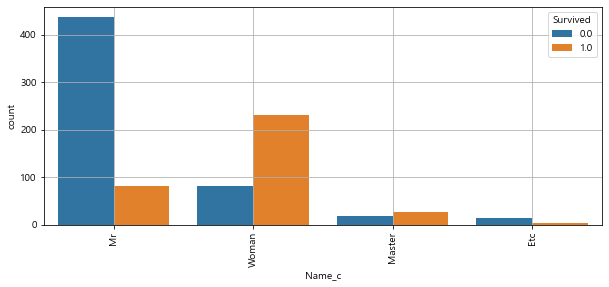

In [109]:
plt.figure(figsize=(10, 4))

sns.countplot(data=titanic_total, x='Name_c', hue='Survived')
plt.xticks(rotation=90)
plt.grid()

plt.show()

### 3.2 Family 가공

In [112]:
titanic_total['Family'] = titanic_total['SibSp'] + titanic_total['Parch']

In [114]:
titanic_total['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

<AxesSubplot:xlabel='Family', ylabel='count'>

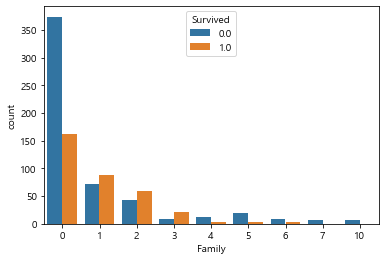

In [117]:
sns.countplot(data=titanic_total, x='Family', hue='Survived')

In [119]:
family_map = {0:'Alone', 1:'Small_F', 2:'Small_F', 3:'Small_F', 
              4:'Big_F', 5:'Big_F', 6:'Big_F', 7:'Big_F', 10:'Big_F'}

titanic_total['Family_c'] = titanic_total['Family'].map(family_map)

<AxesSubplot:xlabel='Family_c', ylabel='count'>

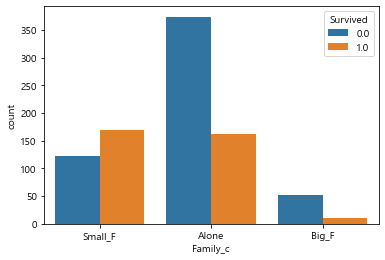

In [121]:
sns.countplot(data=titanic_total, x='Family_c', hue='Survived')

### 3.3 Fare 가공

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

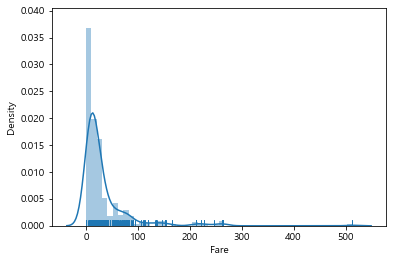

In [123]:
sns.distplot(titanic_total['Fare'], rug=True)

In [131]:
import numpy as np

# outlier 가 존재해서 log 로 변환
titanic_total['Fare_log'] = np.log(titanic_total['Fare'] + 1)

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

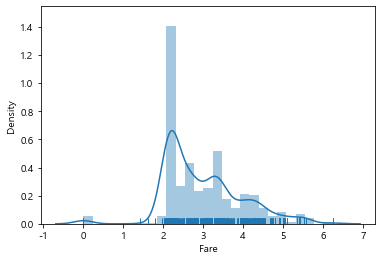

In [130]:
sns.distplot(temp, rug=True)

### 3.4 Age 가공

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

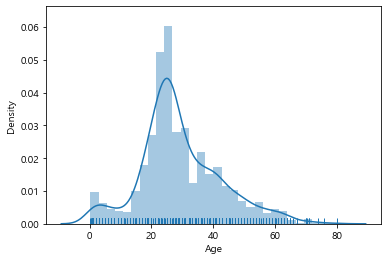

In [133]:
sns.distplot(titanic_total['Age'], rug=True)

In [137]:
# 데이터 범위 조정 0~80 => 
# 특정 Feature 의 단위가 크면 영향을 준다. 
# min-max scaling
# 데이터를 최소값으로 빼고 최대값과 최소값의 간격으로 나눠주는 것

age_min = titanic_total['Age'].min()
age_max = titanic_total['Age'].max()

titanic_total['Age_s'] = (titanic_total['Age'] - age_min) / (age_max - age_min)

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_s', ylabel='Density'>

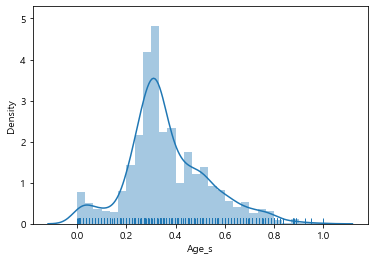

In [138]:
sns.distplot(titanic_total['Age_s'], rug=True)

### 3.5 숫자데이터 => 카테고리

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\d

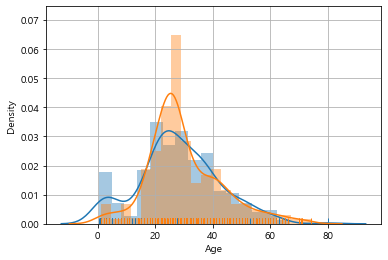

In [142]:
sns.distplot(titanic_total[ titanic_total['Survived']==1 ]['Age'], rug=True)
sns.distplot(titanic_total[ titanic_total['Survived']==0 ]['Age'], rug=True)

plt.grid()

<AxesSubplot:xlabel='Age', ylabel='Count'>

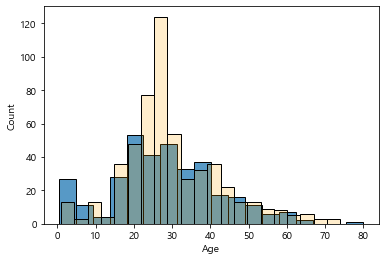

In [144]:
sns.histplot(data=titanic_total[ titanic_total['Survived']==1 ], x='Age')
sns.histplot(data=titanic_total[ titanic_total['Survived']==0 ], x='Age', color='orange', alpha=0.2)

In [146]:
# 0 ~ 10 => Baby
# 10 ~ 20 & 32 ~ 80 => etc
# 20 ~ 32 => Young

age_cut = [0, 10, 20, 32, 80]
label = ['Baby', 'Etc', 'Young', 'Etc2']

# (0, 10]
# (10, 20]
# (20, 32]
# (32, 80]

titanic_total['Age_c'] = pd.cut( titanic_total['Age'], bins=age_cut, labels=label )

In [147]:
titanic_total.loc[titanic_total['Age_c']=='Etc2', 'Age_c'] = 'Etc'

<AxesSubplot:xlabel='Age_c', ylabel='count'>

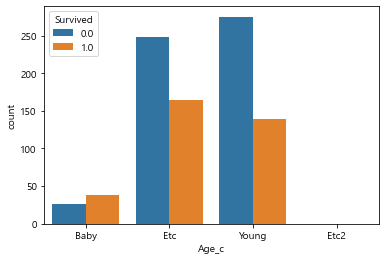

In [148]:
sns.countplot(data=titanic_total, x='Age_c', hue='Survived')

### 3.6 One-Hot Encoding

In [218]:
titanic_after = pd.get_dummies( titanic_total, columns=['Pclass', 'Sex', 'Embarked', 'Name_c', 'Family_c', 'Age_c'],
               drop_first=True )

In [152]:
titanic_after

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_2,...,Embarked_Q,Embarked_S,Name_c_Master,Name_c_Mr,Name_c_Woman,Family_c_Big_F,Family_c_Small_F,Age_c_Etc,Age_c_Young,Age_c_Etc2
0,1,0.0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,Mr,...,0,1,0,1,0,0,1,0,1,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,Mrs,...,0,0,0,0,1,0,1,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Miss,...,0,1,0,0,1,0,0,0,1,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,Mrs,...,0,1,0,0,1,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,Mr,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,"Spector, Mr. Woolf",25.962264,0,0,A.5. 3236,8.0500,NaN,Mr,...,0,1,0,1,0,0,0,0,1,0
1305,1306,NaN,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,C105,Dona,...,0,0,0,0,1,0,0,1,0,0
1306,1307,NaN,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Mr,...,0,1,0,1,0,0,0,1,0,0
1307,1308,NaN,"Ware, Mr. Frederick",25.962264,0,0,359309,8.0500,NaN,Mr,...,0,1,0,1,0,0,0,0,1,0


## 4. 머신러닝 모델을 이용하여 예측
### 4.1 데이터 정리

In [156]:
titanic_after.columns

feature = ['Fare_log', 'Age_s', 'Pclass_2',
           'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Name_c_Master',
           'Name_c_Mr', 'Name_c_Woman', 'Family_c_Big_F', 'Family_c_Small_F']

target = 'Survived'

In [157]:
titanic_after

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Name_2,...,Embarked_Q,Embarked_S,Name_c_Master,Name_c_Mr,Name_c_Woman,Family_c_Big_F,Family_c_Small_F,Age_c_Etc,Age_c_Young,Age_c_Etc2
0,1,0.0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,Mr,...,0,1,0,1,0,0,1,0,1,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,Mrs,...,0,0,0,0,1,0,1,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Miss,...,0,1,0,0,1,0,0,0,1,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,Mrs,...,0,1,0,0,1,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,Mr,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,"Spector, Mr. Woolf",25.962264,0,0,A.5. 3236,8.0500,NaN,Mr,...,0,1,0,1,0,0,0,0,1,0
1305,1306,NaN,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,C105,Dona,...,0,0,0,0,1,0,0,1,0,0
1306,1307,NaN,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Mr,...,0,1,0,1,0,0,0,1,0,0
1307,1308,NaN,"Ware, Mr. Frederick",25.962264,0,0,359309,8.0500,NaN,Mr,...,0,1,0,1,0,0,0,0,1,0


In [165]:
# PassengerId를 인덱스로 세팅

titanic_after = titanic_after.set_index('PassengerId')

In [167]:
# train // test 분리
# feature, target 분리

train_raw = titanic_after.dropna( subset=['Survived'])

train_feature = train_raw[feature]

In [171]:
# target데이터가 Nan이 들어오면서 실수가 됐으으므로 다시 정수로 바꿔줌

train_target = train_raw[target].apply(int)

In [173]:
test_raw = titanic_after[titanic_after['Survived'].isna()]
test_feature = test_raw[feature]

### 4.2 KNN 모델 적용하기

In [175]:
# 필요한 모듈 import 하기

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [179]:
# 훈련용 데이터와 검증용 데이터로 나누기

train_x, valid_x, train_y, valid_y = train_test_split( train_feature, train_target, 
                                                      test_size=0.1, shuffle=True, random_state=1 )

In [181]:
# 교차검증을 이용해서 하이퍼파라미터 결정

kf = KFold(n_splits=10, shuffle=True, random_state=1)

score_list = []
for k in range(2, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, train_x, train_y, cv=kf).mean() # 10개의 결과값이 나오므로, 평균값만 보자
    score_list.append(score)

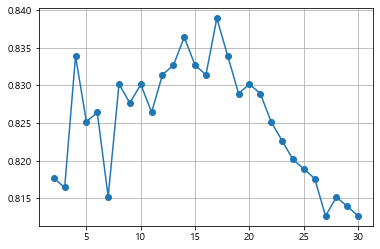

In [182]:
plt.plot(range(2, 31), score_list, marker='o')

plt.grid()

In [207]:
# 모델 훈련하고 검증

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(train_x, train_y)

knn.score(valid_x, valid_y)

0.7888888888888889

In [208]:
# 예측

predict = knn.predict(test_feature)

In [188]:
# 제출용 csv 만들기

predict_df = pd.DataFrame( {'Survived':predict})
predict_df.index = test_feature.index
predict_df.reset_index().to_csv(r'타이타닉_knn.csv', index=False)

### 4.3 SVM 모델 적용하기
- Support Vector Machine
- 데이터를 분류하는 선을 긋는 것 

In [193]:
from sklearn.svm import SVC

In [198]:
# 하이퍼파라미터 C를 조정하기 위해서 교차검증을 해보자 

score_list = []

for c in [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]:
    svc= SVC(C=c)
    score = cross_val_score(svc, train_x, train_y, cv=kf).mean() 
    score_list.append(score)

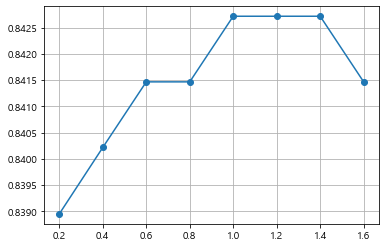

In [199]:
plt.plot([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6], score_list, marker='o')

plt.grid()

In [204]:
svc = SVC(C=1.0)
svc.fit(train_x, train_y)

svc.score(valid_x, valid_y)

0.7555555555555555

In [214]:
predict = svc.predict(test_feature)

predict_df = pd.DataFrame( {'Survived':predict})
predict_df.index = test_feature.index
predict_df.reset_index().to_csv(r'타이타닉_scv.csv', index=False)

# Feature 데이터 조정하기

In [276]:
titanic_after = pd.get_dummies( titanic_total, columns=['Pclass', 'Sex', 'Embarked', 'Name_c', 'Family_c', 'Age_c'],
               drop_first=True )

In [277]:
titanic_after.columns

feature = ['Fare_log', 'Age_s', 'Pclass_2',
           'Pclass_3', 'Sex_male', 'Family_c_Big_F', 'Family_c_Small_F']

target = 'Survived'

titanic_after = titanic_after.set_index('PassengerId')

train_raw = titanic_after.dropna( subset=['Survived'])
train_feature = train_raw[feature]
train_target = train_raw[target].apply(int)

test_raw = titanic_after[titanic_after['Survived'].isna()]
test_feature = test_raw[feature]

In [278]:
train_x, valid_x, train_y, valid_y = train_test_split( train_feature, train_target, 
                                                      test_size=0.1, shuffle=True, random_state=1 )

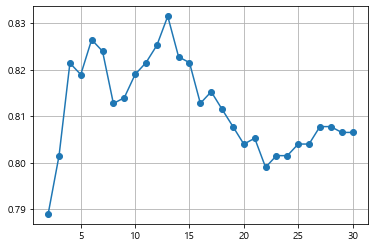

In [279]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

score_list = []
for k in range(2, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, train_x, train_y, cv=kf).mean() # 10개의 결과값이 나오므로, 평균값만 보자
    score_list.append(score)

plt.plot(range(2, 31), score_list, marker='o')
plt.grid()

In [281]:
# 모델 훈련하고 검증 - Score: 0.78468

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_x, train_y)

print(knn.score(valid_x, valid_y))

predict = knn.predict(test_feature)
print(predict)

predict_df = pd.DataFrame( {'Survived':predict})
predict_df.index = test_feature.index
predict_df.reset_index().to_csv(r'타이타닉_knn.csv', index=False)

0.7777777777777778
[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


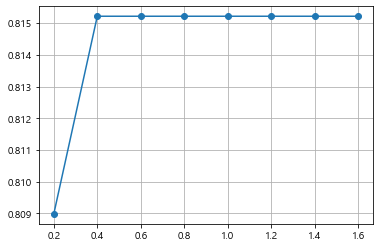

In [267]:
score_list = []

for c in [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]:
    svc= SVC(C=c)
    score = cross_val_score(svc, train_x, train_y, cv=kf).mean() 
    score_list.append(score)
    
plt.plot([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6], score_list, marker='o')
plt.grid()

In [269]:
svc = SVC(C=0.6)
svc.fit(train_x, train_y)

print(svc.score(valid_x, valid_y))

predict = svc.predict(test_feature)
print(predict)

predict_df = pd.DataFrame( {'Survived':predict})
predict_df.index = test_feature.index
predict_df.reset_index().to_csv(r'타이타닉_scv.csv', index=False)

0.7444444444444445
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


# 리뷰

In [ ]:
# pandas
# 새로운 자료구조 2개 => Series, DataFrame

# Series
# 1차원 자료구조
# 구성요소 2개 : index, values
# 순서있음

# DataFrame
# 2차원 자료구조
# 구성요소 3개 : column, index, values
# 순서있음 => 기본적으로 행

In [282]:
tip_df = sns.load_dataset('tips')

In [283]:
# 컬럼 기준

tip_df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [284]:
# 행으로 가져오기

tip_df.loc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [285]:
# 포인트로 접근하기
# .loc[인덱스, 컬럼]
# 데이터를 바꿀 때도 .loc[] !!!

tip_df.loc[0, 'total_bill']

16.99

In [290]:
# 행의 순서를 이용해서 가져오기 => iloc

tip_df.iloc[-1, :2]

total_bill    18.78
tip             3.0
Name: 243, dtype: object

In [291]:
# 시리즈의 연산, 필터링, apply, groupby, pivot

# apply => 한 시리지의 모든 데이터에게 똑같은 코드를 적용해 줌
tip_df['total_bill'].apply( lambda x: str(x) + '%' )

0      16.99%
1      10.34%
2      21.01%
3      23.68%
4      24.59%
        ...  
239    29.03%
240    27.18%
241    22.67%
242    17.82%
243    18.78%
Name: total_bill, Length: 244, dtype: object

In [294]:
# groupby => 데이터를 특정 컬럼의 카테고리 기준으로 묶어줌

tip_df.groupby(['smoker', 'day']).mean().reset_index()

,smoker,day,total_bill,tip,size
0,Yes,Thur,19.190588,3.030000,2.352941
1,Yes,Fri,16.813333,2.714000,2.066667
2,Yes,Sat,21.276667,2.875476,2.476190
3,Yes,Sun,24.120000,3.516842,2.578947
4,No,Thur,17.113111,2.673778,2.488889
5,No,Fri,18.420000,2.812500,2.250000
6,No,Sat,19.661778,3.102889,2.555556
7,No,Sun,20.506667,3.167895,2.929825


In [296]:
# pivot

pd.pivot_table( tip_df, index='smoker', columns='day', values='total_bill', aggfunc='mean')

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,19.190588,16.813333,21.276667,24.120000
No,17.113111,18.420000,19.661778,20.506667


In [ ]:
# DF 연습하기
# 엑셀 데이터를 DF으로 바꾸는 연습
# read_excel
# 컬럼 -> 인덱스 -> 데이터 값
# 컬럼 
#    사용할 컬럼 추리기
#    컬럼명을 바꿔줌
# 인덱스
#    보통의 경우 0,1,2,... 로 만들기
#    시계열 데이터 경우 datetime 으로 세팅
# 데이터 값
#    결측 데이터 체크
#    데이터 타입 체크

In [ ]:
# 데이터 붙이기
# merge
#    옆으로 붙이기
#    한번에 2개만 붙일 수 있음
#    inner, outer, ...
# concat
#    밑으로 이어 붙이기
#    여러개의 DF를 한번에 붙일 수 있음
#    [df, df, ...] 리스트로 묶어서 입력

In [ ]:
# 시각화
# 데이터를 이해하기 위해서
# 데이터 => 연속된 숫자, 카테고리

# 연속된 숫자
# 분포 => histplot, distpolt

# 카테고리
# 분포 => 카테고리 별 데이터의 갯수
# countplot

# 연속된 숫자 & 카테고리
# 카테고리 별 연속된 숫자 분포
# boxplot, violinplot

# 연속된 숫자 & 연속된 숫자
# 산포도
# scatter

# 카테고리 & 카테고리
# countplot hue, pivot => heatmap

# 기타
# pairplot, bar, plot

In [ ]:
# 머신러닝
# 모델은 다 있으니 가져다 쓰면 됨
# 어떻게 잘 쓸 것이냐
# 데이터를 잘 가공하고
# 모델의 레버를 잘 조절 => 하이퍼파라미터를 잘 조정 => 오버피팅과 언더피팅 사이에 적절한 선을 잘 찾아야 함

In [ ]:
# 주피터 노트북 익스텐션

In [ ]:
plotly, bokeh